<a href="https://colab.research.google.com/github/amnamalik1993/Stroke-Prediction/blob/main/Project_2_Part_2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Imports

## Pandas
import pandas as pd
## Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt
## seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


## Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

## Regression Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report



## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [2]:
# Loading Data

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwT4Q_Hiezgbu98UOI6Qb9BbkmnK8ghZ7-xowBNpr2_h2CHcE9JJNC4vzyAs4rxdRlIdmYCFBoldlj/pub?output=csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **Data Cleaning**

Delete unnecessary columns.

In [4]:
df.drop(columns = ['id','ever_married'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [5]:
df.shape

(5110, 10)

Delete duplicate rows.

In [6]:
# Checking if we have any duplicates

df.duplicated().sum()

0

Identify and address missing values.

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# % of missing data in this dataset
df.isna().sum() / len(df) * 100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

3.93% of data is missing from the data. We going to drop the missing values as this will not effect the dataset as much.

In [9]:
df.dropna(inplace = True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Identify and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [10]:
# Inspecting and addressing inconsistencies in categorical data
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['gender', 'work_type', 'Residence_type', 'smoking_status'], dtype='object')

In [11]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- gender:
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64



- work_type:
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64



- Residence_type:
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64



- smoking_status:
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64





In [75]:
df = df.drop(df[df['work_type'] == 'Never_Worked'].index)

In [76]:
work_type_map = {'children':'Children','Self-employed':'Self_Employed','Govt_job':'Govt_Job'}

df['work_type'] = df['work_type'].replace(work_type_map)
df['work_type'].value_counts()

Private          2810
Self_Employed     775
Children          652
Govt_Job          630
Name: work_type, dtype: int64

In [14]:
smoking_status_map = {'never smoked':'Never_Smoked','formerly smoked':'Formerly_Smoked','smokes':'Smokes'}

df['smoking_status'] = df['smoking_status'].replace(smoking_status_map)
df['smoking_status'].value_counts()

Never_Smoked       1852
Unknown            1483
Formerly_Smoked     837
Smokes              737
Name: smoking_status, dtype: int64

The categorical data is consistent now. Moving on to the numerical data

In [15]:
data_types = df.dtypes
num_cols = data_types[data_types !='object'].index
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [16]:
for col in num_cols:
    print(f'Column = {col}')
    print(df[col].sort_values(ascending=False))
    print('\n\n')

Column = age
2314    82.00
670     82.00
4819    82.00
2341    82.00
3603    82.00
        ...  
3968     0.16
4021     0.16
3618     0.16
1614     0.08
3295     0.08
Name: age, Length: 4909, dtype: float64



Column = hypertension
759     1
3677    1
3578    1
1775    1
1776    1
       ..
1838    0
1835    0
1834    0
1833    0
5109    0
Name: hypertension, Length: 4909, dtype: int64



Column = heart_disease
0       1
636     1
2433    1
923     1
2122    1
       ..
1788    0
1787    0
1786    0
1784    0
5109    0
Name: heart_disease, Length: 4909, dtype: int64



Column = avg_glucose_level
193     271.74
1207    267.76
3088    267.61
4983    267.60
2462    266.59
         ...  
772      55.26
682      55.25
4110     55.23
1191     55.22
4886     55.12
Name: avg_glucose_level, Length: 4909, dtype: float64



Column = bmi
2128    97.6
4209    92.0
928     78.0
544     71.9
1559    66.8
        ... 
922     12.3
657     12.0
2187    11.5
3307    11.3
1609    10.3
Name: bmi, Length: 

In [17]:
df['age'].sort_values(ascending = True)

3295     0.08
1614     0.08
3968     0.16
3618     0.16
4021     0.16
        ...  
3400    82.00
2979    82.00
3422    82.00
1068    82.00
2453    82.00
Name: age, Length: 4909, dtype: float64

It is evident that some rows of ages less than 1. We will going to investigate more and see decide what the course of treatment should be of this.

In [18]:
df.loc[df['age'] < 1]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,Children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,Children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,Children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,Children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,Children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,Children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,Children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,Children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,Children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,Children,Urban,139.67,14.1,Unknown,0


In [19]:
df.loc[df['age'] < 1].value_counts().sum()

42

Going to round these ages to nearest integar. 

In [20]:
df['age'] = df['age'].round()

In [21]:
df.loc[df['age'] == 0].value_counts().sum()

19

In [22]:
df = df[df.age != 0]
df.loc[df['age'] == 0].value_counts().sum()

0

There are 19 ages that have rounded to zero. I will not drop these as they may cause data loss. However I will change the data type from float to integar as ages are whole numbers.

In [23]:
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4890 non-null   object 
 1   age                4890 non-null   int64  
 2   hypertension       4890 non-null   int64  
 3   heart_disease      4890 non-null   int64  
 4   work_type          4890 non-null   object 
 5   Residence_type     4890 non-null   object 
 6   avg_glucose_level  4890 non-null   float64
 7   bmi                4890 non-null   float64
 8   smoking_status     4890 non-null   object 
 9   stroke             4890 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 420.2+ KB


The data is clean and all inconsistencies are addressed. 

## **Univariate Visuals for the Target and all Features**

### **Defining Target Vector (y):**  **stroke**



### **Defining Features (X)**: **gender, age, hypertenion, heart_disease, work_type, Residence_type, avg_glucose_level, bmi and smoking_status**

<ipython-input-24-5c839c247ccb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

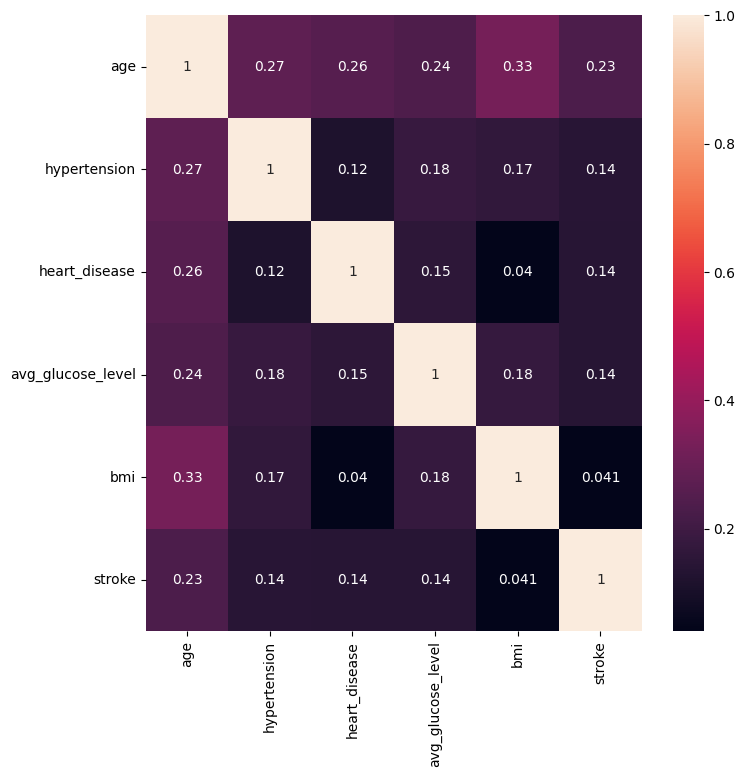

In [24]:
corr = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)

From the heatmap above:
*   All features have correlations.
*   It is clear that there is low correlation between Age and BMI
*   These correlations are not very strong.





In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4890 non-null   object 
 1   age                4890 non-null   int64  
 2   hypertension       4890 non-null   int64  
 3   heart_disease      4890 non-null   int64  
 4   work_type          4890 non-null   object 
 5   Residence_type     4890 non-null   object 
 6   avg_glucose_level  4890 non-null   float64
 7   bmi                4890 non-null   float64
 8   smoking_status     4890 non-null   object 
 9   stroke             4890 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 420.2+ KB


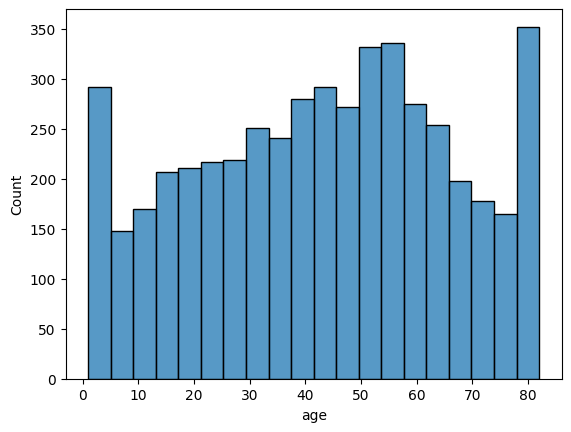

In [26]:
ax = sns.histplot(data = df, x = 'age')



*   The counts are very high between Age 40 to 80. 
*   Strokes are likely to happen between these age groups.



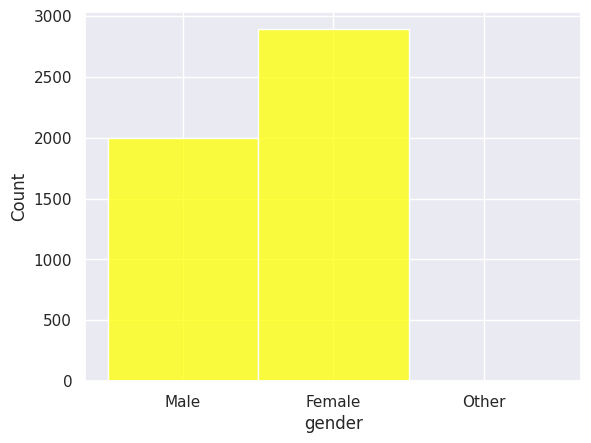

In [27]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'gender', color = 'yellow')
plt.xlabel('gender');



*   Females are more likely to have stroke than males as per this histogram.
*   Females should be center of this analysis when it comes to gender.



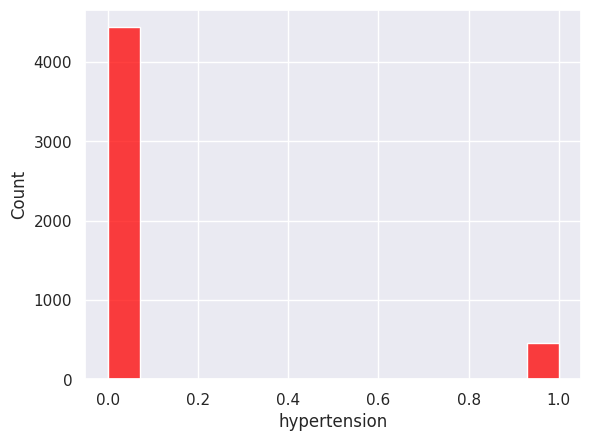

In [28]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'hypertension', color = 'red')
plt.xlabel('hypertension');


*   The 0 represents patients who don't have hypertemsion and 1 represents patients who do have hypertension.
*   There are less patients with hypertension.


*   Patients with hypertension are morely to have stroke as compared to patients with no hypertension.





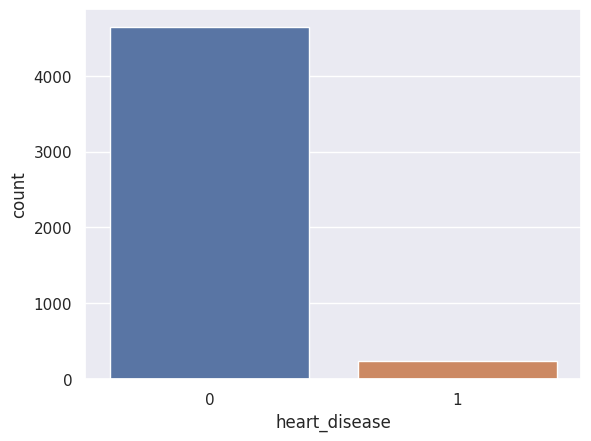

In [29]:
ax = sns.countplot(data = df, x = 'heart_disease');



*   0 reprsent patients with no heart disease. 1 represent patients with heart disease.
*   In this data, there are less patients with heart disease.

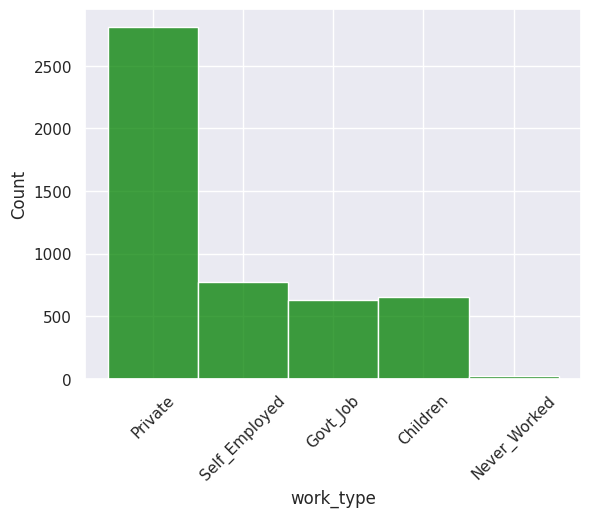

In [30]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'work_type', color = 'green')
plt.xticks(rotation = 45 )
plt.xlabel('work_type');



*   The visuals represent 5 work types.
*   The analysis is based on these different natures of work. 



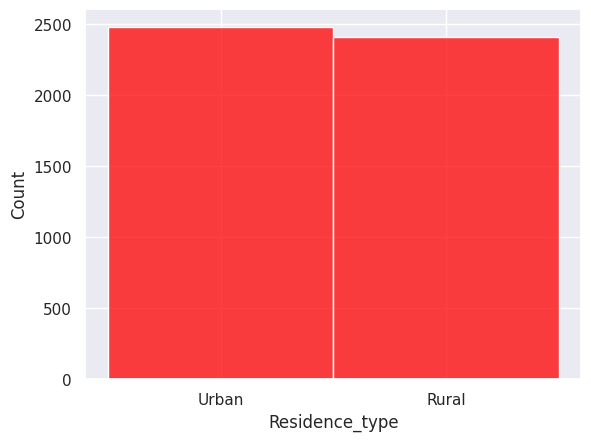

In [31]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'Residence_type', color = 'red')
plt.xlabel('Residence_type');



*   There are two type of patients residence. One is Urban and the other is rural.
*   Counts of patients living in Urban are slightly higher than rural area. 





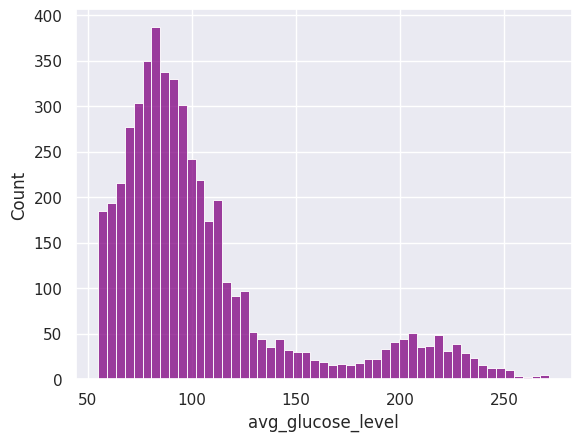

In [32]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'avg_glucose_level', color = 'purple')
plt.xlabel('avg_glucose_level');



*   This graph shows variation in the average glucose level in the patients.
*   Counts are highest in the range between 50 and almost 150.



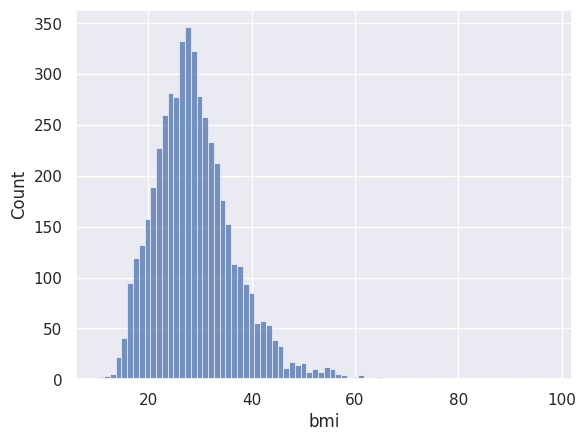

In [33]:
ax = sns.histplot(data = df, x = 'bmi')

*   This graph shows variation in bmi in the patients.
*   Counts are highest in the range between 20 and 40.


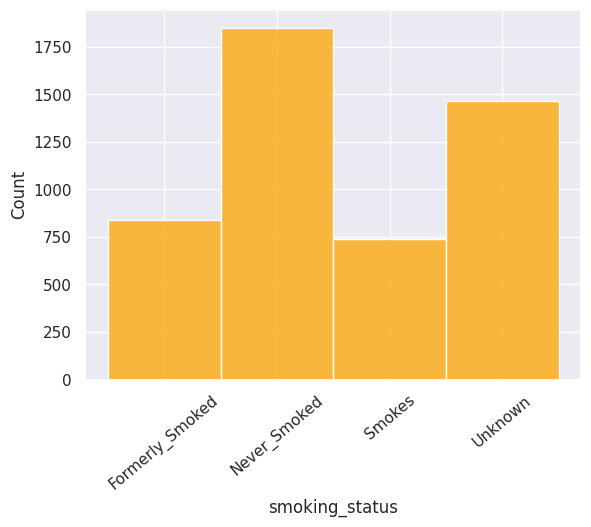

In [34]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'smoking_status', color = 'orange')
plt.xticks(rotation = 40 )
plt.xlabel('smoking_status');



*   This graph shows the smoking status of different patients.
*   The prediction of getting a stroke are highest for patients who never smoked.

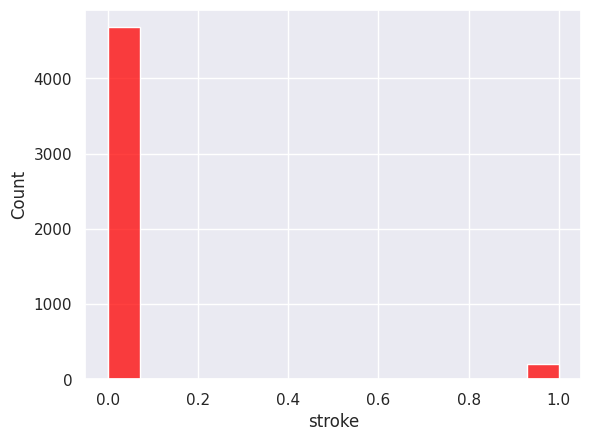

In [35]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'stroke', color = 'red')
plt.xlabel('stroke');


*   Two kinds of patients are shown in this graph. 1 represents patients who had a stroke and 0 represents patients who did not have a stroke.
*   Clearly, there are more patients who had a stroke as compared to those who did not.



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4890 non-null   object 
 1   age                4890 non-null   int64  
 2   hypertension       4890 non-null   int64  
 3   heart_disease      4890 non-null   int64  
 4   work_type          4890 non-null   object 
 5   Residence_type     4890 non-null   object 
 6   avg_glucose_level  4890 non-null   float64
 7   bmi                4890 non-null   float64
 8   smoking_status     4890 non-null   object 
 9   stroke             4890 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 420.2+ KB


In [37]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

Urban    2480
Rural    2410
Name: Residence_type, dtype: int64


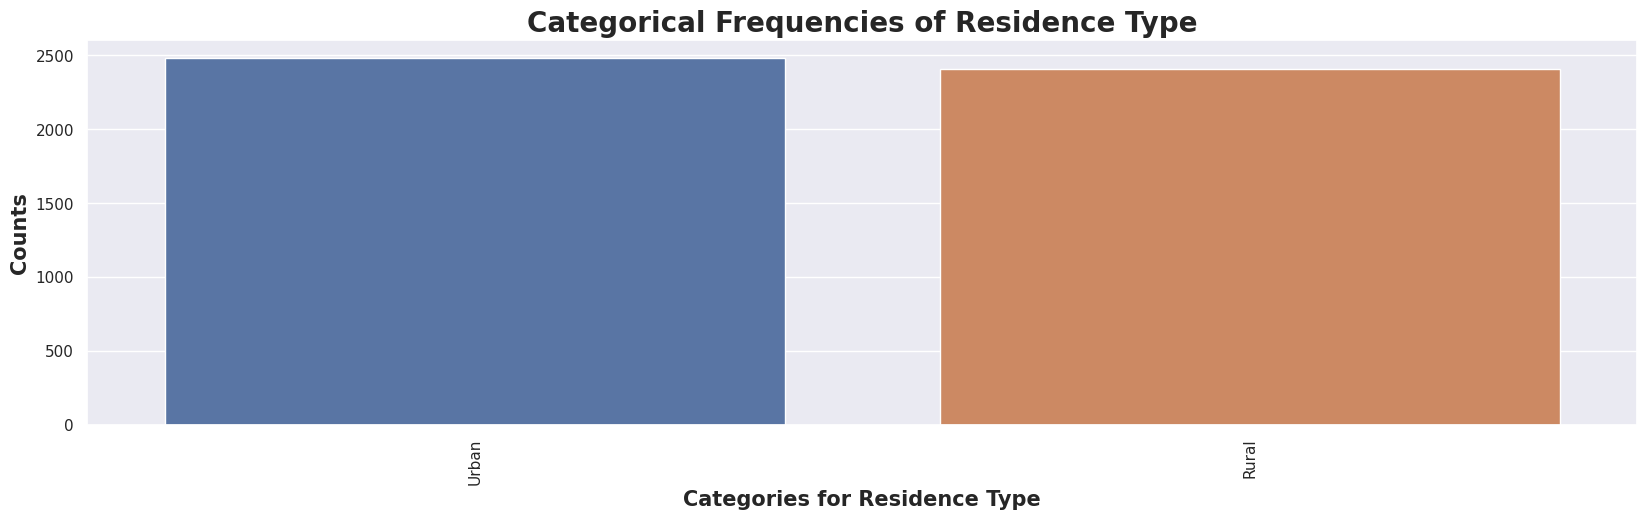

In [38]:
fig, ax = plot_bar(df, 'Residence_type', 'Residence Type')
print(df['Residence_type'].value_counts())

*   There are two type of patients residence. One is Urban and the other is rural.
*   Counts of patients living in Urban are slightly higher than rural area. 

In [39]:
df = df.drop(df[df['gender'] == 'Other'].index)

Female    2890
Male      1999
Name: gender, dtype: int64


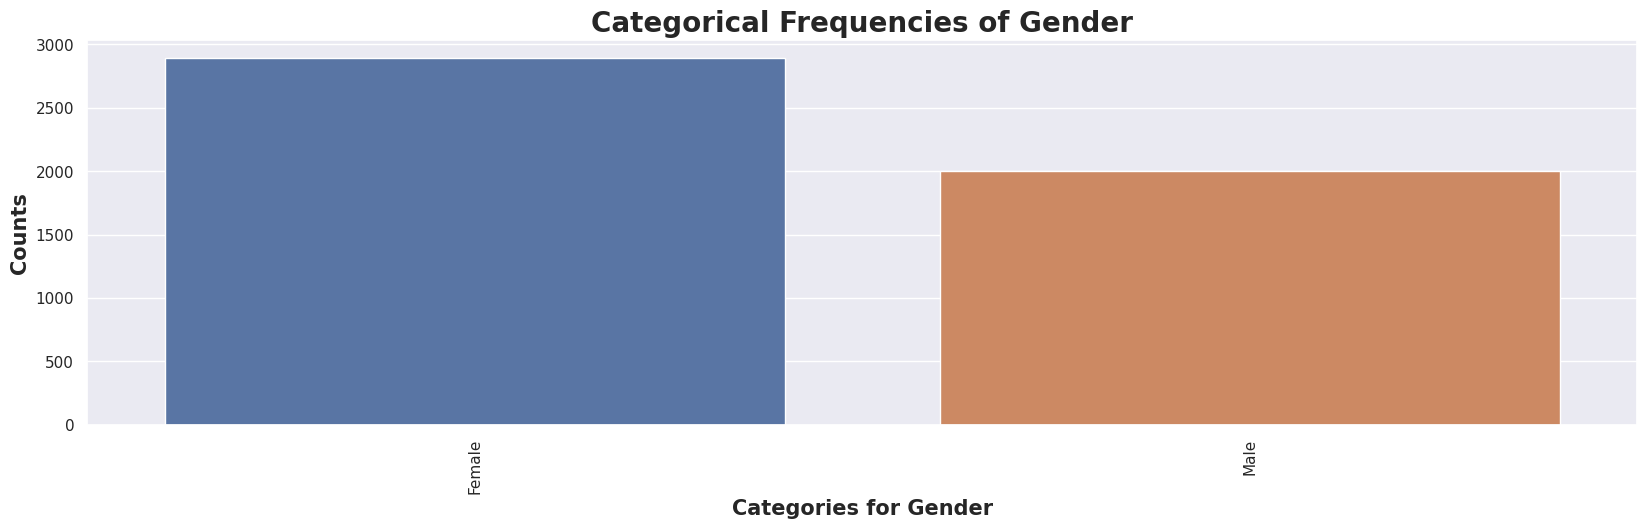

In [40]:
fig, ax = plot_bar(df, 'gender', 'Gender')
print(df['gender'].value_counts())

*   Females are more likely to have stroke than males as per this plot.
*   Females should be center of this analysis when it comes to gender.


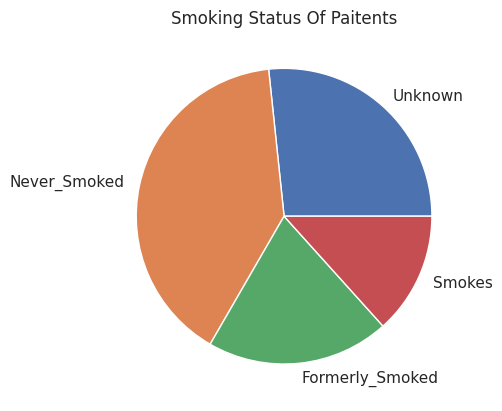

In [41]:

# data for the pie chart
sizes = [20, 30, 15, 10]
labels = ['Unknown', 'Never_Smoked', 'Formerly_Smoked', 'Smokes']

# create a pie chart
plt.pie(sizes, labels=labels)

# add a title
plt.title('Smoking Status Of Paitents')

# show the plot
plt.show()


*   This graph shows the smoking status of different patients.
*   The prediction of getting a stroke are highest for patients who never smoked.

## **Part 4**

**Validation Split**

In [42]:
# set features (X) and target (y)

X = df.drop(columns=['stroke'])
y = df['stroke']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# Instantiate column selectors
## number & category selector
num_sel = make_column_selector(dtype_include= 'number' )
cat_sel = make_column_selector(dtype_include='object')

# Instantiate Simple Imputer
median_imp = SimpleImputer(strategy='median')

# Instantiate Transformers
## Scaler for numeric
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)

# Pipeline
num_pipe = make_pipeline(median_imp, scaler)

# Tuple for column transformer
num_tup = (num_pipe, num_sel)
cat_tup = (ohe, cat_sel)

# ColumnTransformer
preprocessor = make_column_transformer(num_tup, cat_tup, remainder='passthrough')

In [44]:
# fitting my X_train model
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0880>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0b80>)])

In [45]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed

array([[ 0.97827696, -0.31504027, -0.22523514, ...,  0.        ,
         1.        ,  0.        ],
       [-0.63284763, -0.31504027, -0.22523514, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.1279612 , -0.31504027, -0.22523514, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.16988915, -0.31504027, -0.22523514, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.39648197, -0.31504027, -0.22523514, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.62024927, -0.31504027, -0.22523514, ...,  0.        ,
         0.        ,  0.        ]])

## Random Forest Regressor Model

In [46]:
# Create an instance of the model
rf = RandomForestRegressor()
# Create a model pipeline
rf_pipe = make_pipeline(preprocessor, rf)
# Fit the model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0880>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0b80>)])),
                ('randomforestregressor', RandomForestRegressor())])

**Prediction of the Model**

In [48]:
# Predictions for train and test data
rf_pipe.predict(X_train)
rf_pipe.predict(X_test)

array([0.36, 0.08, 0.  , ..., 0.  , 0.07, 0.  ])

**Tunning the Model**

In [49]:
# Train and Test scores
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.8557290041251556
0.07035264915161477


In [50]:
# Params for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0880>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0b80>)])),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'columntransformer': ColumnTran

**GridSearch on the Random Forest Model**

In [51]:
# Tune rf with GridSearchCV
rf_param_grid = {'randomforestregressor__max_features': [6,8,10],
                 'randomforestregressor__n_estimators':[20,45,75,85],
                 'randomforestregressor__max_depth': [10,20,45,75]}

# GridSearch using pipeline and param grid
rf_gs = GridSearchCV(rf_pipe, rf_param_grid)

# fitting GSCV
rf_gs.fit(X_train, y_train)

# print best parameters
print('Best Random Forest Parameters:')
print(rf_gs.best_params_)

# print accuracy using .best_estimator
rf_best = rf_gs.best_estimator_
print(f'Accuracy of Random Forest Model: {rf_best.score(X_test, y_test)}')

Best Random Forest Parameters:
{'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 6, 'randomforestregressor__n_estimators': 85}
Accuracy of Random Forest Model: 0.08712017838250441


In [52]:
rf_tuned = RandomForestRegressor(max_features=6, n_estimators=85, max_depth=10, random_state=42)

rf_tuned_pipe = make_pipeline(preprocessor, rf_tuned)

In [53]:
rf_tuned_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0880>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0b80>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, max_features=6,
                                       n_estimators=85, random_state=42))])

In [54]:
# Train and Test scores
rf1_train_score = rf_tuned_pipe.score(X_train, y_train)
rf1_test_score = rf_tuned_pipe.score(X_test, y_test)
print(rf1_train_score)
print(rf1_test_score)

0.6357240656655689
0.08522160686938562


**Random Forest Regressor Model Observations:**

*   The score on the test dataset improved after the tunning.
*   The train score, on the other hand, got worse after tunning the model.



## Decision Tree Model

In [55]:
# Model
dc_tree = DecisionTreeRegressor(random_state = 42)
# Pipeline for preprocessor and model
dc_pipe = make_pipeline(preprocessor, dc_tree)
# Fitting pipeline
dc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0880>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0b80>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [56]:
# Train predictions
train_preds = dc_pipe.predict(X_train)
# Test predictions
test_preds = dc_pipe.predict(X_test)

In [57]:
# Scores for train and test
train_score = dc_pipe.score(X_train, y_train)
test_score = dc_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
-0.6902435686918444


In [58]:
# Looking at options for tuning this model
dc_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0880>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0b80>)])),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'columntransform

**GridSearch on the Decision Tree Model**

In [59]:
# Tune decision tree with GridSearchCV
dt_param_grid = {'decisiontreeregressor__max_features': [6,8,10],
                 'decisiontreeregressor__max_depth':[20,45,75,85]}

# GridSearch using pipeline and param grid
dt_gs = GridSearchCV(dc_pipe, dt_param_grid)

# fitting GridSearchCV
dt_gs.fit(X_train, y_train)

# print best parameters
print('Best Random Forest Parameters:')
print(dt_gs.best_params_)

# print accuracy using .best_estimator
dt_best = dt_gs.best_estimator_
print(f'Accuracy of Random Forest Model: {rf_best.score(X_test, y_test)}')

Best Random Forest Parameters:
{'decisiontreeregressor__max_depth': 20, 'decisiontreeregressor__max_features': 10}
Accuracy of Random Forest Model: 0.08712017838250441


In [60]:
dt_tuned = DecisionTreeRegressor(max_features=10, max_depth=20, random_state=42)

dt_tuned_pipe = make_pipeline(preprocessor, dt_tuned)

dt_tuned_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0880>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b2dcc0b80>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=20, max_features=10,
                                       random_state=42))])

In [61]:
# Train and Test scores
dt_train_score = dt_tuned_pipe.score(X_train, y_train)
dt_test_score = dt_tuned_pipe.score(X_test, y_test)
print(dt_train_score)
print(dt_test_score)

1.0
-0.77391899288451


**Decision Tree Model Observations:**


*   The model is not performing well on the testing set.
*   This could be because the data is not well suited for Decision Tree Model.




## **Principal Component Analysis**

In [63]:
pca = PCA()

transformer = make_pipeline(preprocessor, pca)

rf1_model = RandomForestRegressor(random_state = 42)

rf1_pcs = make_pipeline(transformer, rf1_model)


In [64]:
# train with PCA
%timeit rf1_pcs.fit(X_train, y_train)

4.85 s ± 687 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
# Save the model's predictions for the train dataset
%timeit rf1_train_preds = rf1_pcs.predict(X_train)
# Save the model's predictions for the test dataset
%timeit rf1_test_preds = rf1_pcs.predict(X_test)

72.4 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
34 ms ± 4.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
# Checking the accurancy of our model with PCA 
print('Testing accuracy:', rf1_pcs.score(X_test, y_test))

Testing accuracy: 0.04139091133004935


In [67]:
pca = PCA(n_components=.95)

transformer = make_pipeline(preprocessor, pca)

rf_tuned_pcs = make_pipeline(transformer, rf_tuned)

In [68]:
# train with PCA
%timeit rf_tuned_pcs.fit(X_train, y_train)

1.56 s ± 481 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
# Save the model's predictions for the train dataset
%timeit rf_train_preds = rf_tuned_pcs.predict(X_train)
# Save the model's predictions for the test dataset
%timeit rf_test_preds = rf_tuned_pcs.predict(X_test)

59.7 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.7 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
# Checking the accurancy of our model with PCA 
print('Testing accuracy:', rf_tuned_pcs.score(X_test, y_test))

Testing accuracy: 0.06861812218766628


**Observations:**


*   With setting n_components = .95, the testing accuracy improved as compared to the default PCA testing accuracy.
*   By specifying the minimum proportion of explained variance, PCA helps redure the number of components just enough to meet the specification.


Overall Recommendation:



*   The model that I will recommend to the production is the Random Forest Model
*   The score on testing improved after tunning the model.


*   Further metrices for this model will be shown below







Function to Evaluate Model

In [80]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  r2 = r2_score(y_true,y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  
  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [82]:
rf_tuned = RandomForestRegressor(max_features=6, n_estimators=85, max_depth=10, random_state=42)

rf_tuned_pipe = make_pipeline(preprocessor, rf_tuned)

rf_tuned_pipe.fit(X_train, y_train)

print('Training Scores for High Variance RF')
evaluate_model(y_train, rf_tuned_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance RF')
evaluate_model(y_test, rf_tuned_pipe.predict(X_test), split = 'testing')
     

Training Scores for High Variance RF
Results for training data:
  - R^2 = 0.636
  - RMSE = 0.118



Testing Scores for High Variance RF
Results for testing data:
  - R^2 = 0.085
  - RMSE = 0.211





*   It can be seen that model is performing well on the testing set.
*   The R^2 and RMSE further show how the tuned model performs.

